In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'D:\CODE\Data Analytics\files\IRIS.csv')

# Display the first few rows of the dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['species'],categories = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe


<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

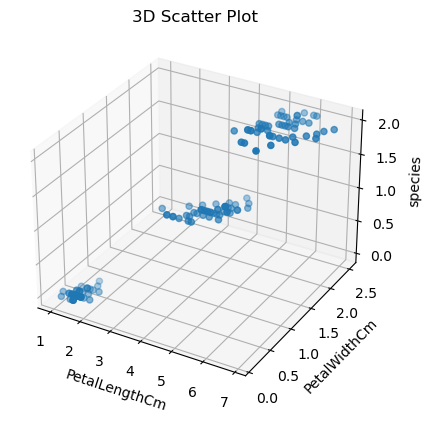

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.petal_length,df.petal_width,df.species)
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('species')
plt.title('3D Scatter Plot')
plt.show()

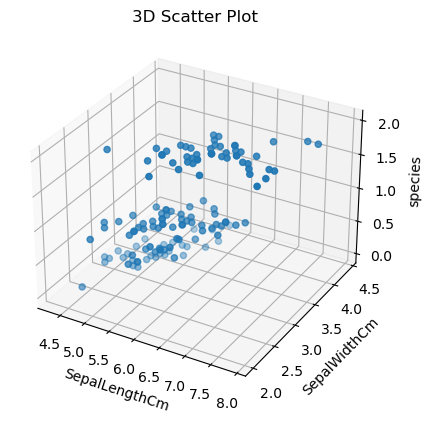

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.sepal_length,df.sepal_width,df.species)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('species')
plt.title('3D Scatter Plot')
plt.show()

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

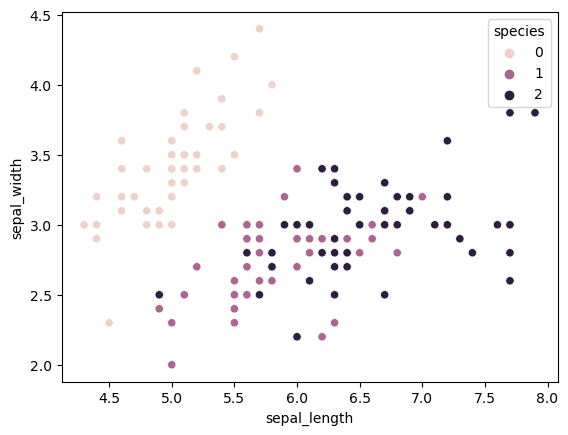

In [8]:
#scateer plot
sns.scatterplot(data=df,x="sepal_length",y="sepal_width",hue="species")

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

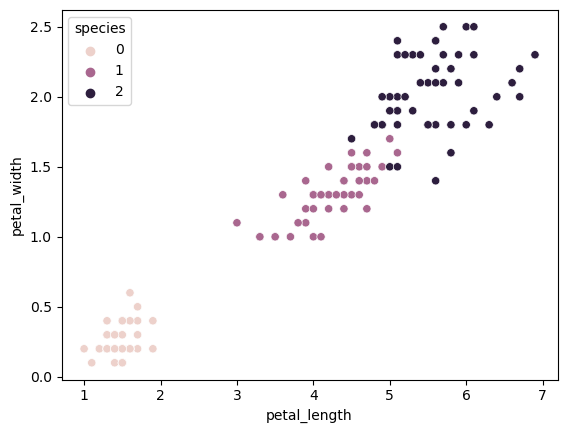

In [9]:
sns.scatterplot(data=df,x="petal_length",y="petal_width",hue="species")

In [10]:
k_rng =range(1,10)
sse=[]

for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal_length','petal_width']])
    sse.append(km.inertia_)
print(sse)    
    

C:\Users\lenovo\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[550.6434666666667, 86.40394533571005, 31.387758974358977, 19.48238901098901, 13.933308757908756, 11.056639971910453, 9.210266732047511, 7.794063268844046, 6.5730095571095575]


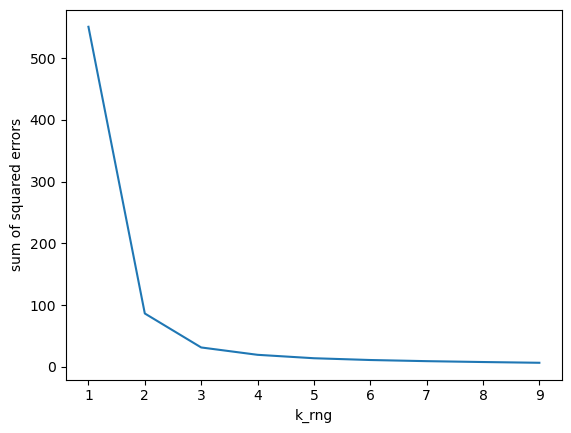

In [11]:
plt.xlabel('k_rng')
plt.ylabel("sum of squared errors")
plt.plot(k_rng, sse)

In [12]:
km = KMeans(n_clusters=3,random_state=0)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
df['cluster']=y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df.species, df.cluster)
cm

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 46,  4]], dtype=int64)

In [17]:
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import messagebox
from sklearn.cluster import KMeans

# Load dataset and train KMeans model on all four features
df = pd.read_csv(r'D:\CODE\Data Analytics\files\IRIS.csv')

# Apply KMeans clustering on all four features: sepal_length, sepal_width, petal_length, and petal_width
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Mapping of cluster labels to species
cluster_to_species = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Function to handle button click and update the label with predicted species
def predict_cluster():
    try:
        # Get the inputs from the user
        sepal_length = float(entry_sepal_length.get())
        sepal_width = float(entry_sepal_width.get())
        petal_length = float(entry_petal_length.get())
        petal_width = float(entry_petal_width.get())
        
        # Create input data with all four features
        input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
        
        # Use the KMeans model to predict the cluster
        predicted_cluster = kmeans.predict(input_data)[0]  # Predict the cluster
        
        # Map the predicted cluster to species
        predicted_species = cluster_to_species[predicted_cluster]
        
        # Update the result label with the predicted species
        result_label.config(text=f"Predicted Species: {predicted_species}")
    except ValueError:
        messagebox.showerror("Invalid Input", "Please enter valid numerical values!")

# Initialize the Tkinter app
app = tk.Tk()
app.title("Iris Cluster Predictor")

# Labels and input fields for sepal and petal dimensions
tk.Label(app, text="Sepal Length").grid(row=0, column=0, padx=10, pady=10)
entry_sepal_length = tk.Entry(app)
entry_sepal_length.grid(row=0, column=1, padx=10, pady=10)

tk.Label(app, text="Sepal Width").grid(row=1, column=0, padx=10, pady=10)
entry_sepal_width = tk.Entry(app)
entry_sepal_width.grid(row=1, column=1, padx=10, pady=10)

tk.Label(app, text="Petal Length").grid(row=2, column=0, padx=10, pady=10)
entry_petal_length = tk.Entry(app)
entry_petal_length.grid(row=2, column=1, padx=10, pady=10)

tk.Label(app, text="Petal Width").grid(row=3, column=0, padx=10, pady=10)
entry_petal_width = tk.Entry(app)
entry_petal_width.grid(row=3, column=1, padx=10, pady=10)

# Button to trigger the prediction
predict_button = tk.Button(app, text="Predict Species", command=predict_cluster)
predict_button.grid(row=4, column=0, columnspan=2, padx=10, pady=10)

# Label to display the result, initially set as N/A
result_label = tk.Label(app, text="Predicted Species: N/A", font=("Arial", 14))
result_label.grid(row=5, column=0, columnspan=2, padx=10, pady=10)

# Run the Tkinter event loop
app.mainloop()


C:\Users\lenovo\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
